Price of a property is one of the most important decision criterion when people buy homes. Real state firms need to be consistent in their pricing in order to attract buyers . Having a predictive model for the same will be great tool to have , which in turn can also be used to tweak development of properties , putting more emphasis on qualities which increase the value of the property.



We have given you two datasets , housing_train.csv and housing_test.csv . You need to use data housing_train to build predictive model for response variable "Price". Housing_test data contains all other factors except "Price", you need to predict that using the model that you developed and submit your predicted values in a csv files.



Evaluation Criterion : 

Score will be calculated as:

Score =212467/RMSE (Note : Dont worry about change in scoring method , this is just a cosmetic change to alter scale of score , passing criterion hasn't changed and you dont need to resubmit )

Where RMSE is root mean square error on test file. 

In [122]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Data Import

In [123]:
df_test = pd.read_csv("housing_test.csv")


In [124]:
df_train = pd.read_csv("housing_train.csv")

list_price = df_train['Price'].tolist()
# using statistics.variance
res = statistics.variance(list_price)

In [125]:
res

432958829214.68365

In [126]:
df_train.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Distance           0
Postcode           0
Bedroom2        1559
Bathroom        1559
Car             1559
Landsize        1564
BuildingArea    4209
YearBuilt       3717
CouncilArea     1564
dtype: int64

In [127]:
df_train.groupby('Type').mean()['Price']["h"] - df_train.groupby('Type').mean()['Price']["t"]

392384.1973344474

In [129]:
df_train.groupby('Type').mean()['Price']

Type
h    1.294320e+06
t    9.019357e+05
u    6.058606e+05
Name: Price, dtype: float64

In [64]:
len(set(df_train['Postcode'].tolist()))

94

In [65]:
varaince_df = df_train.groupby('CouncilArea').var()

varaince_df.sort_values('Price').tail()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
CouncilArea,,,,,,,,,,
Whitehorse,1.066688,4.274222e+11,0.569625,1.308470,0.944690,0.495891,0.668616,1.440536e+05,5410.584153,1083.069783
Port Phillip,0.724629,5.490051e+11,3.432295,232.892862,0.727445,0.346345,0.584419,7.243920e+05,3181.576901,2053.750601
Bayside,0.990626,6.128933e+11,1.832081,0.695404,0.968973,0.691969,0.662618,1.272962e+05,11149.751033,1032.356446
Boroondara,1.243290,7.801388e+11,4.205819,236.093708,1.172145,0.875069,0.934658,8.929052e+06,39651.278177,1272.082367
Stonnington,0.914036,9.942186e+11,7.393861,236.673018,0.917832,0.490837,0.751700,2.094654e+06,7007.131181,1573.049241


In [66]:
total_sales_df = df_train.groupby('SellerG').sum()

total_sales_df.sort_values('Price')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
SellerG,,,,,,,,,,
hockingstuart/Advantage,1,330000,5.9,3055,1.0,1.0,1.0,0.0,42.0,1970.0
hockingstuart/Village,1,345000,7.0,3013,1.0,1.0,1.0,0.0,47.0,1970.0
Iconek,3,368000,14.5,3061,3.0,1.0,2.0,600.0,0.0,0.0
Oak,2,380000,9.1,3015,2.0,1.0,1.0,78.0,62.0,1960.0
Calder,3,418000,13.5,3020,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Buxton,1223,478821050,4917.0,1282851,825.0,467.0,461.0,133801.0,25769.0,358391.0
hockingstuart,1910,688298789,6316.8,2224526,1502.0,836.0,860.0,278242.0,41590.0,702358.0
Marshall,1373,799242250,3250.0,1353478,1072.0,633.0,555.0,161327.0,40398.0,451231.0


## Data Exploration

array([[<AxesSubplot:title={'center':'Distance'}>]], dtype=object)

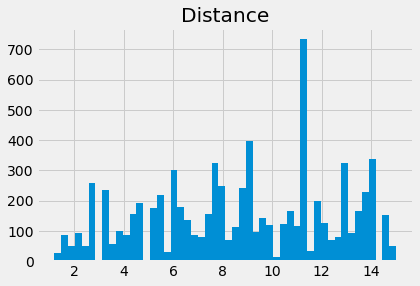

In [67]:
df_train.hist(column='Distance', bins= 50)


Above visualization suggests no relationship between the price and the year built, hence we can drop this parameter as well

In [68]:
df_train.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Brunswick,52 Evans St,3,h,1650000,S,Nelson,5.2,3056,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland
1,Reservoir,85 Radford Rd,5,h,791000,S,Ray,11.2,3073,4.0,3.0,1.0,961.0,NaN,NaN,Darebin
2,Newport,99 Anderson St,3,h,785000,S,RT,8.4,3015,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay
3,Brighton East,4/377 South Rd,2,u,755000,SP,Buxton,10.7,3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hawthorn East,3 Jaques St,5,h,2500000,VB,RT,7.5,3123,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara


array([[<AxesSubplot:title={'center':'YearBuilt'}>]], dtype=object)

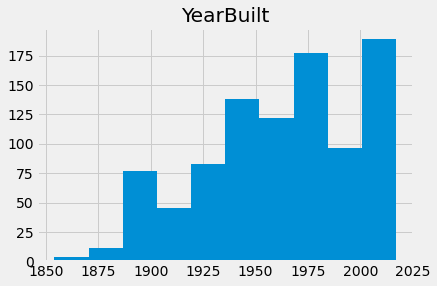

In [69]:
df_test.hist(column='YearBuilt')


In [70]:
df_test['YearBuilt'].unique()

array([  nan, 1890., 2010., 1920., 2013., 1998., 2009., 1980., 2011.,
       1975., 1950., 1960., 2003., 1995., 1900., 2000., 1910., 2004.,
       1970., 2014., 1965., 1967., 2008., 1940., 1978., 2015., 2012.,
       1990., 1930., 1961., 2016., 1997., 1955., 2006., 1957., 1974.,
       1945., 1986., 1988., 1912., 1924., 1952., 1938., 1925., 1915.,
       2007., 2005., 1963., 1994., 1969., 1927., 1968., 1973., 1903.,
       1888., 1880., 2001., 1991., 1905., 1917., 1996., 1972., 2002.,
       1854., 1885., 1898., 1989., 2017., 1983., 1985., 1934., 1913.,
       1992., 1928., 1977., 1999., 1949., 1863., 1868., 1956., 1948.,
       1935., 1966., 1951., 1947., 1929., 1958.])

In [71]:
## checking number of different suburbs and council area to see which one to keep for dummy variable creation

len(df_train['Suburb'].unique().tolist())

142

In [72]:
len(df_train['CouncilArea'].unique().tolist())

20

In [73]:
len(df_train['Postcode'].unique().tolist())

94

In [74]:
## we will group by council and get average prices to decide which councils to club together

new_df = df_train.groupby('CouncilArea', as_index=False)['Price'].mean()

new_df = new_df.sort_values(by=['Price'])


<AxesSubplot:xlabel='CouncilArea'>

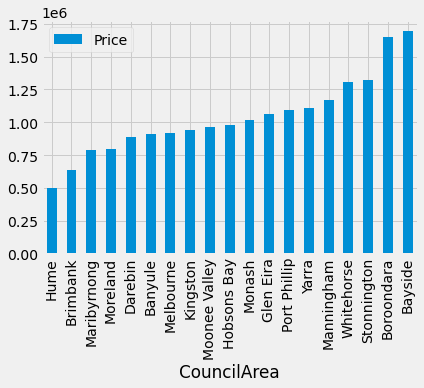

In [75]:
new_df.plot(x="CouncilArea", y="Price", kind="bar")


In [76]:
new_df['CouncilArea'].unique()

array(['Hume', 'Brimbank', 'Maribyrnong', 'Moreland', 'Darebin',
       'Banyule', 'Melbourne', 'Kingston', 'Moonee Valley', 'Hobsons Bay',
       'Monash', 'Glen Eira', 'Port Phillip', 'Yarra', 'Manningham',
       'Whitehorse', 'Stonnington', 'Boroondara', 'Bayside'], dtype=object)

## Data Cleaning

In [77]:
df_test = df_test.drop(['SellerG','Address','Distance','Postcode','Suburb','YearBuilt'], axis=1)

After exploratory analysis in excel, there are 4 geographical parameters about each property, suburb, Council Area, Post Code and distance to City center. Because Suburb predicts all the other parameters 100% of the time, we only need to capture the suburb for geographical information in input variables

Hence We will drop Distance, Council and Post Code from the training and testing data

Address is dropped because it does not directly predict the price or has too many possible values

In [78]:
df_test.shape

(1885, 9)

In [79]:
df_train = df_train.drop(['Address','Distance','Postcode','Suburb','YearBuilt','SellerG'], axis=1)

In [80]:
df_train = df_train.dropna()

In [81]:
df_train

,Rooms,Type,Price,Method,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea
0,3,h,1650000,S,3.0,1.0,2.0,495.0,141.0,Moreland
4,5,h,2500000,VB,5.0,3.0,3.0,757.0,240.0,Boroondara
9,2,u,750000,S,2.0,2.0,2.0,0.0,80.0,Whitehorse
11,2,u,510000,S,2.0,1.0,1.0,0.0,69.0,Glen Eira
14,4,h,600500,S,4.0,2.0,1.0,462.0,161.0,Moreland
...,...,...,...,...,...,...,...,...,...,...
7524,4,h,1650000,SA,5.0,3.0,2.0,598.0,212.0,Bayside
7525,2,u,820000,S,2.0,1.0,3.0,336.0,109.0,Glen Eira
7527,3,h,580000,S,3.0,1.0,2.0,650.0,142.0,Moreland
7528,4,h,1225000,SP,4.0,2.0,1.0,319.0,130.0,Maribyrnong


## Data Preprocessing 

creating dummy variable for categorical columns. 

In [82]:
df_train.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea'],
      dtype='object')

In [83]:
df_train

,Rooms,Type,Price,Method,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea
0,3,h,1650000,S,3.0,1.0,2.0,495.0,141.0,Moreland
4,5,h,2500000,VB,5.0,3.0,3.0,757.0,240.0,Boroondara
9,2,u,750000,S,2.0,2.0,2.0,0.0,80.0,Whitehorse
11,2,u,510000,S,2.0,1.0,1.0,0.0,69.0,Glen Eira
14,4,h,600500,S,4.0,2.0,1.0,462.0,161.0,Moreland
...,...,...,...,...,...,...,...,...,...,...
7524,4,h,1650000,SA,5.0,3.0,2.0,598.0,212.0,Bayside
7525,2,u,820000,S,2.0,1.0,3.0,336.0,109.0,Glen Eira
7527,3,h,580000,S,3.0,1.0,2.0,650.0,142.0,Moreland
7528,4,h,1225000,SP,4.0,2.0,1.0,319.0,130.0,Maribyrnong


In [84]:
df_train.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea'],
      dtype='object')

In [85]:
mappings = {
    'Hume' : 'low',
    'Brimbank': 'low',
    'Moreland': 'low',
    'Maribyrnong': 'low',
    'Darebin': 'low',
    'Melbourne': 'low',
    'Kingston' : 'med', 
    'Hobsons Bay': 'med', 
    'Moonee Valley': 'med', 
    'Banyule': 'med',
    'Monash': 'med', 
    'Glen Eira': 'med', 
    'Yarra': 'med', 
    'Port Phillip': 'med', 
    'Manningham': 'med',
    'Whitehorse': 'high', 
    'Stonnington': 'high', 
    'Boroondara': 'high', 
    'Bayside': 'high'
}

df_train['CouncilArea'] = df_train['CouncilArea'].replace(mappings)
df_test['CouncilArea'] = df_test['CouncilArea'].replace(mappings)

In [86]:
df_train

,Rooms,Type,Price,Method,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea
0,3,h,1650000,S,3.0,1.0,2.0,495.0,141.0,low
4,5,h,2500000,VB,5.0,3.0,3.0,757.0,240.0,high
9,2,u,750000,S,2.0,2.0,2.0,0.0,80.0,high
11,2,u,510000,S,2.0,1.0,1.0,0.0,69.0,med
14,4,h,600500,S,4.0,2.0,1.0,462.0,161.0,low
...,...,...,...,...,...,...,...,...,...,...
7524,4,h,1650000,SA,5.0,3.0,2.0,598.0,212.0,high
7525,2,u,820000,S,2.0,1.0,3.0,336.0,109.0,med
7527,3,h,580000,S,3.0,1.0,2.0,650.0,142.0,low
7528,4,h,1225000,SP,4.0,2.0,1.0,319.0,130.0,low


In [87]:
dummy_cols = ['Type', 'Method', 'CouncilArea']

df_train = pd.get_dummies(df_train, columns=dummy_cols)
df_test = pd.get_dummies(df_test, columns=dummy_cols)

In [88]:
## Removing one dummy column for each of the categorical variable: Type, Method and CouncilArea

df_train = df_train.drop('Type_h', axis = 1)
df_train = df_train.drop('Method_PI', axis = 1)
df_train = df_train.drop('CouncilArea_high', axis = 1)

In [89]:
df_train

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_low,CouncilArea_med
0,3,1650000,3.0,1.0,2.0,495.0,141.0,0,0,1,0,0,0,1,0
4,5,2500000,5.0,3.0,3.0,757.0,240.0,0,0,0,0,0,1,0,0
9,2,750000,2.0,2.0,2.0,0.0,80.0,0,1,1,0,0,0,0,0
11,2,510000,2.0,1.0,1.0,0.0,69.0,0,1,1,0,0,0,0,1
14,4,600500,4.0,2.0,1.0,462.0,161.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7524,4,1650000,5.0,3.0,2.0,598.0,212.0,0,0,0,1,0,0,0,0
7525,2,820000,2.0,1.0,3.0,336.0,109.0,0,1,1,0,0,0,0,1
7527,3,580000,3.0,1.0,2.0,650.0,142.0,0,0,1,0,0,0,1,0
7528,4,1225000,4.0,2.0,1.0,319.0,130.0,0,0,0,0,1,0,1,0


## Checking For Multicollinearity with VIF

In [90]:
## Splitting the data into 4 components: X_train, y_train, X_test and y_test expcept for the fact that y_test is actaully not available

X_train = df_train[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Type_t', 'Type_u', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB',
       'CouncilArea_low', 'CouncilArea_med']]
y_train = df_train['Price']

X_test = df_test[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Type_t', 'Type_u', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB',
       'CouncilArea_low', 'CouncilArea_med']]


In [91]:

  
# the independent variables set
X = X_train
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
# print(vif_data)
## Output max vif is 67 for Rooms hence dropping rooms

X = X.drop('Rooms', axis = 1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
# print(vif_data)

## Removing bedroom2 as max vif at 16 so dropping Bedroom2

X = X.drop('Bedroom2', axis = 1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
# print(vif_data)

## Removing the Bathroom at VIF of 6.27

X = X.drop('Bathroom', axis = 1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)



            feature       VIF
0               Car  3.635845
1          Landsize  1.610840
2      BuildingArea  2.619389
3            Type_t  1.144344
4            Type_u  1.400372
5          Method_S  3.786091
6         Method_SA  1.013707
7         Method_SP  1.707289
8         Method_VB  1.412528
9   CouncilArea_low  2.122533
10  CouncilArea_med  2.439197


In [92]:
X_train = X

X_train


,Car,Landsize,BuildingArea,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_low,CouncilArea_med
0,2.0,495.0,141.0,0,0,1,0,0,0,1,0
4,3.0,757.0,240.0,0,0,0,0,0,1,0,0
9,2.0,0.0,80.0,0,1,1,0,0,0,0,0
11,1.0,0.0,69.0,0,1,1,0,0,0,0,1
14,1.0,462.0,161.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7524,2.0,598.0,212.0,0,0,0,1,0,0,0,0
7525,3.0,336.0,109.0,0,1,1,0,0,0,0,1
7527,2.0,650.0,142.0,0,0,1,0,0,0,1,0
7528,1.0,319.0,130.0,0,0,0,0,1,0,1,0


In [93]:
X1 = X_test
  
# VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [vif(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)
## Output max vif is 67 for Rooms hence dropping rooms

X1 = X1.drop('Rooms', axis = 1)

# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [vif(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

## Removing bedroom2 as max vif at 16 so dropping Bedroom2

X1 = X1.drop('Bedroom2', axis = 1)

# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [vif(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

## Removing the Bathroom at VIF of 6.27

X1 = X1.drop('Bathroom', axis = 1)

# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [vif(X.values, i)
#                           for i in range(len(X.columns))]
  
X_test = X1


## Training Our Model

### First we do Linear Regression

In [94]:
df_train.columns

Index(['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Type_t', 'Type_u', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'CouncilArea_low', 'CouncilArea_med'],
      dtype='object')

Coefficients:  [ 7.61128445e+04  4.08920768e+01  1.37690769e+03 -3.89500952e+05
 -5.98711754e+05  6.83307993e+04 -1.53208506e+04 -7.98763614e+03
  9.68042220e+04 -7.36939261e+05 -5.15985995e+05]


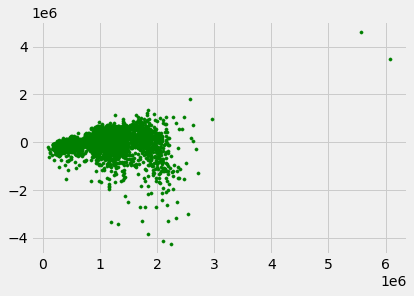

In [95]:

# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  

## method call for showing the plot
plt.show()

In [96]:
lin_reg_pred = pd.DataFrame(reg.predict(X_test))
lin_reg_pred.to_csv("linear_regression_prediction_housing.csv")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [97]:
reg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [98]:
len(reg.predict(X_train))

3327

### Lets try out Random Forest Regression to compare with Linear Regression

In [99]:

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)



RandomForestRegressor(n_estimators=1000, random_state=42)

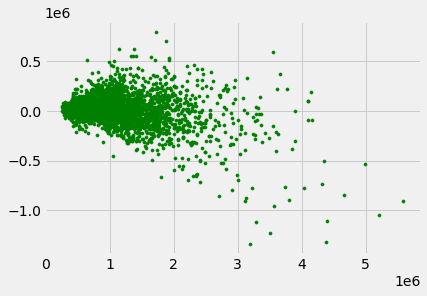

In [100]:
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(rf.predict(X_train), rf.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  

## method call for showing the plot
plt.show()

In [103]:
X_test

,Car,Landsize,BuildingArea,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_low,CouncilArea_med
0,1.0,0.0,NaN,0,1,1,0,0,0,0,1
1,NaN,NaN,NaN,0,1,1,0,0,0,0,0
2,NaN,NaN,NaN,0,1,0,0,1,0,0,0
3,NaN,NaN,NaN,0,0,1,0,0,0,0,0
4,1.0,138.0,105.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1880,NaN,NaN,NaN,0,0,0,0,0,0,0,0
1881,2.0,554.0,129.0,0,0,1,0,0,0,1,0
1882,2.0,236.0,193.0,0,0,0,0,0,0,0,1
1883,1.0,0.0,65.0,0,1,0,0,1,0,0,1


In [104]:
X_test.isna().any()

Car                 True
Landsize            True
BuildingArea        True
Type_t             False
Type_u             False
Method_S           False
Method_SA          False
Method_SP          False
Method_VB          False
CouncilArea_low    False
CouncilArea_med    False
dtype: bool

In [105]:
corr = X_test.corr()
corr.style.background_gradient(cmap='coolwarm')

,Car,Landsize,BuildingArea,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_low,CouncilArea_med
Car,1.000000,0.102787,0.120164,-0.003755,-0.275767,0.006335,-0.017672,-0.026778,-0.039461,-0.016613,-0.046266
Landsize,0.102787,1.000000,0.084300,-0.063961,-0.008923,0.000584,-0.000015,-0.006733,0.027947,0.016472,-0.004466
BuildingArea,0.120164,0.084300,1.000000,-0.007129,-0.167705,0.034972,-0.006333,-0.045035,-0.005850,-0.063258,0.020652
Type_t,-0.003755,-0.063961,-0.007129,1.000000,-0.206613,-0.090933,0.005873,0.051982,0.025059,-0.029681,-0.106627
Type_u,-0.275767,-0.008923,-0.167705,-0.206613,1.000000,-0.073008,-0.015346,0.063624,0.032546,-0.085988,0.038827
Method_S,0.006335,0.000584,0.034972,-0.090933,-0.073008,1.000000,-0.081647,-0.498545,-0.438516,-0.000312,0.080376
Method_SA,-0.017672,-0.000015,-0.006333,0.005873,-0.015346,-0.081647,1.000000,-0.022760,-0.020019,-0.016676,0.012138
Method_SP,-0.026778,-0.006733,-0.045035,0.051982,0.063624,-0.498545,-0.022760,1.000000,-0.122239,0.082747,-0.037754
Method_VB,-0.039461,0.027947,-0.005850,0.025059,0.032546,-0.438516,-0.020019,-0.122239,1.000000,-0.057591,-0.031359
CouncilArea_low,-0.016613,0.016472,-0.063258,-0.029681,-0.085988,-0.000312,-0.016676,0.082747,-0.057591,1.000000,-0.423892


In [115]:
### make dataframe from X_test by selecting only rows where car is not missing as well as building area not missing
### the new dataframe only has following columns: car, type_u and building area 

## just drop all other columns except type_u and building area and then drop all rows with a missing value

X_train_BA = X_test[["Type_u", "BuildingArea"]]
# X_train_BA = X_train_BA.dropna()

X_train_BA.groupby('Type_u').mean()



,BuildingArea
Type_u,
0,175.386992
1,79.738095


In [116]:
X_train_BA

,Type_u,BuildingArea
0,1,NaN
1,1,NaN
2,1,NaN
3,0,NaN
4,0,105.0
...,...,...
1880,0,NaN
1881,0,129.0
1882,0,193.0
1883,1,65.0


In [119]:
# Find rows with missing data.
fill_needed = X_train_BA["BuildingArea"].isna()

# In those rows only, put Solar.R into bins, labelled with values for Ozone.
fill_values = pd.cut(X_train_BA["Type_u"][fill_needed],
                     [-.1, 0.5, 1.1],
                     labels=[175.38, 79.73],
                     ordered=False).astype(float)

# Put the fill values into the holes in the Ozone series.
X_train_BA["BuildingArea"].fillna(fill_values, inplace=True)

X_train_BA

X_test

C:\Users\shari\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Type_u,BuildingArea
0,1,79.73
1,1,79.73
2,1,79.73
3,0,175.38
4,0,105.00
...,...,...
1880,0,175.38
1881,0,129.00
1882,0,193.00
1883,1,65.00


In [121]:
X_test['BuildingArea'] = X_train_BA["BuildingArea"]

X_test

,Car,Landsize,BuildingArea,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_low,CouncilArea_med
0,1.0,0.0,79.73,0,1,1,0,0,0,0,1
1,NaN,NaN,79.73,0,1,1,0,0,0,0,0
2,NaN,NaN,79.73,0,1,0,0,1,0,0,0
3,NaN,NaN,175.38,0,0,1,0,0,0,0,0
4,1.0,138.0,105.00,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1880,NaN,NaN,175.38,0,0,0,0,0,0,0,0
1881,2.0,554.0,129.00,0,0,1,0,0,0,1,0
1882,2.0,236.0,193.00,0,0,0,0,0,0,0,1
1883,1.0,0.0,65.00,0,1,0,0,1,0,0,1


In [150]:
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Car,Landsize,BuildingArea,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_low,CouncilArea_med
Car,1.000000,0.205012,0.270323,-0.014356,-0.248894,-0.039899,0.027447,-0.022759,0.040849,-0.030975,-0.060301
Landsize,0.205012,1.000000,0.172818,-0.102602,-0.132503,-0.018956,-0.001245,0.008820,-0.009097,-0.035178,-0.011966
BuildingArea,0.270323,0.172818,1.000000,0.000704,-0.308494,-0.003043,0.007660,-0.062216,0.029365,-0.129226,-0.007520
Type_t,-0.014356,-0.102602,0.000704,1.000000,-0.190136,-0.014029,-0.017107,-0.006399,0.014495,0.031811,-0.006699
Type_u,-0.248894,-0.132503,-0.308494,-0.190136,1.000000,-0.077271,-0.003454,0.063128,0.054606,-0.018106,0.013023
Method_S,-0.039899,-0.018956,-0.003043,-0.014029,-0.077271,1.000000,-0.069113,-0.534229,-0.415467,-0.027767,0.043041
Method_SA,0.027447,-0.001245,0.007660,-0.017107,-0.003454,-0.069113,1.000000,-0.020967,-0.016306,-0.000397,-0.011103
Method_SP,-0.022759,0.008820,-0.062216,-0.006399,0.063128,-0.534229,-0.020967,1.000000,-0.126039,0.096662,-0.008319
Method_VB,0.040849,-0.009097,0.029365,0.014495,0.054606,-0.415467,-0.016306,-0.126039,1.000000,-0.038073,-0.030636
CouncilArea_low,-0.030975,-0.035178,-0.129226,0.031811,-0.018106,-0.027767,-0.000397,0.096662,-0.038073,1.000000,-0.630768


In [102]:
rf_pred_housing = pd.DataFrame(rf.predict(X_test))
rf_pred_housing.to_csv("Shariya_Hasan_P1_part2.csv")


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
rf_pred_housing.shape

In [ ]:
import statistics 
list_price = y_train.tolist()
# using statistics.variance
res = statistics.variance(list_price)
res

In [ ]:
new_df.plot(x="SellerG", y="Price", kind="bar")

In [49]:
X_train.columns

Index(['Car', 'Landsize', 'BuildingArea', 'Type_t', 'Type_u', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB', 'CouncilArea_low',
       'CouncilArea_med'],
      dtype='object')

In [50]:
X_test.columns

Index(['Car', 'Landsize', 'BuildingArea', 'Type_t', 'Type_u', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB', 'CouncilArea_low',
       'CouncilArea_med'],
      dtype='object')

In [54]:
X_train.shape

(3327, 11)